## Telecomunicaciones: Identificar operaciones ineficaces. 

Para el proyecto trabajaremos como empleados de una empresa de telefonía virtual llamada "CallMeMaybe", la cuál esta desarrollando una nueva función que brindará al personal de supervisión información sobre los operadores más y menos eficaces.<br>
<br>
Se considera un operador ineficaz a aquel trabajador que tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, el operador también tiene que realizar llamadas salientes, así que si en este rubro tiene pocas llamadas, de igual forma se le considerará ineficaz.
<br>
Para llevar acabo este proyecto se deberá:<br>
<br>
En python:<br>
    *   Llevar a cabo el análisis exploratorio de los datos.<br>
    *   Identificar operaciones ineficaces.<br>
    *   Probar las hipótesis estadísticas.<br>
<br>
En Tableau:<br>
    *   Generar un dashboard con los principales KPI's.<br>
<br>
Generar una presentación con las conclusiones de nuestro análisis.




### 1 Descargar los datos e importar librerias.

In [1]:
# Importar las librerias necesarias para la realización del proyecto.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats as st
from scipy.stats import shapiro
from scipy.stats import levene
import pylab
import matplotlib.cm as cm
import plotly.express as px
from statsmodels.stats.proportion import proportions_ztest

In [2]:
# Cargar los datos.

clientes = pd.read_csv('/Users/angelhdez/Documents/Tripleten/repositorios/Telecom/telecom_clients_us.csv')
data = pd.read_csv('/Users/angelhdez/Documents/Tripleten/repositorios/Telecom/telecom_dataset_us.csv')

### 2 Realizar el análisis exploratorio de los datos.

In [3]:
# Análisis exploratorio de los datos.

def analisis_exploratorio(data):
    """
    Esta función realiza un análisis exploratorio de los datos.
    """
    # Primeras lineas de los datos
    print("Primeras líneas de los datos:")
    print(data.head())
    
    # Descripción de los datos
    print("Descripción de los datos:")
    print(data.describe())
    
    # Información de los datos
    print("\nInformación de los datos:")
    print(data.info())
    
    # Comprobación de valores nulos
    print("\nValores nulos en los datos:")
    print(data.isnull().sum())
    
    # Comprobación de valores duplicados
    print("\nValores duplicados en los datos:")
    print(data.duplicated().sum())
    
    # Visualización de la distribución de las variables numéricas
    sns.pairplot(data)
    plt.show()

Primeras líneas de los datos:
   user_id                       date direction internal  operator_id  \
0   166377  2019-08-04 00:00:00+03:00        in    False          NaN   
1   166377  2019-08-05 00:00:00+03:00       out     True     880022.0   
2   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
3   166377  2019-08-05 00:00:00+03:00       out     True     880020.0   
4   166377  2019-08-05 00:00:00+03:00       out    False     880022.0   

   is_missed_call  calls_count  call_duration  total_call_duration  
0            True            2              0                    4  
1            True            3              0                    5  
2            True            1              0                    1  
3           False            1             10                   18  
4            True            3              0                   25  
Descripción de los datos:
             user_id    operator_id   calls_count  call_duration  \
count   53902.000000   

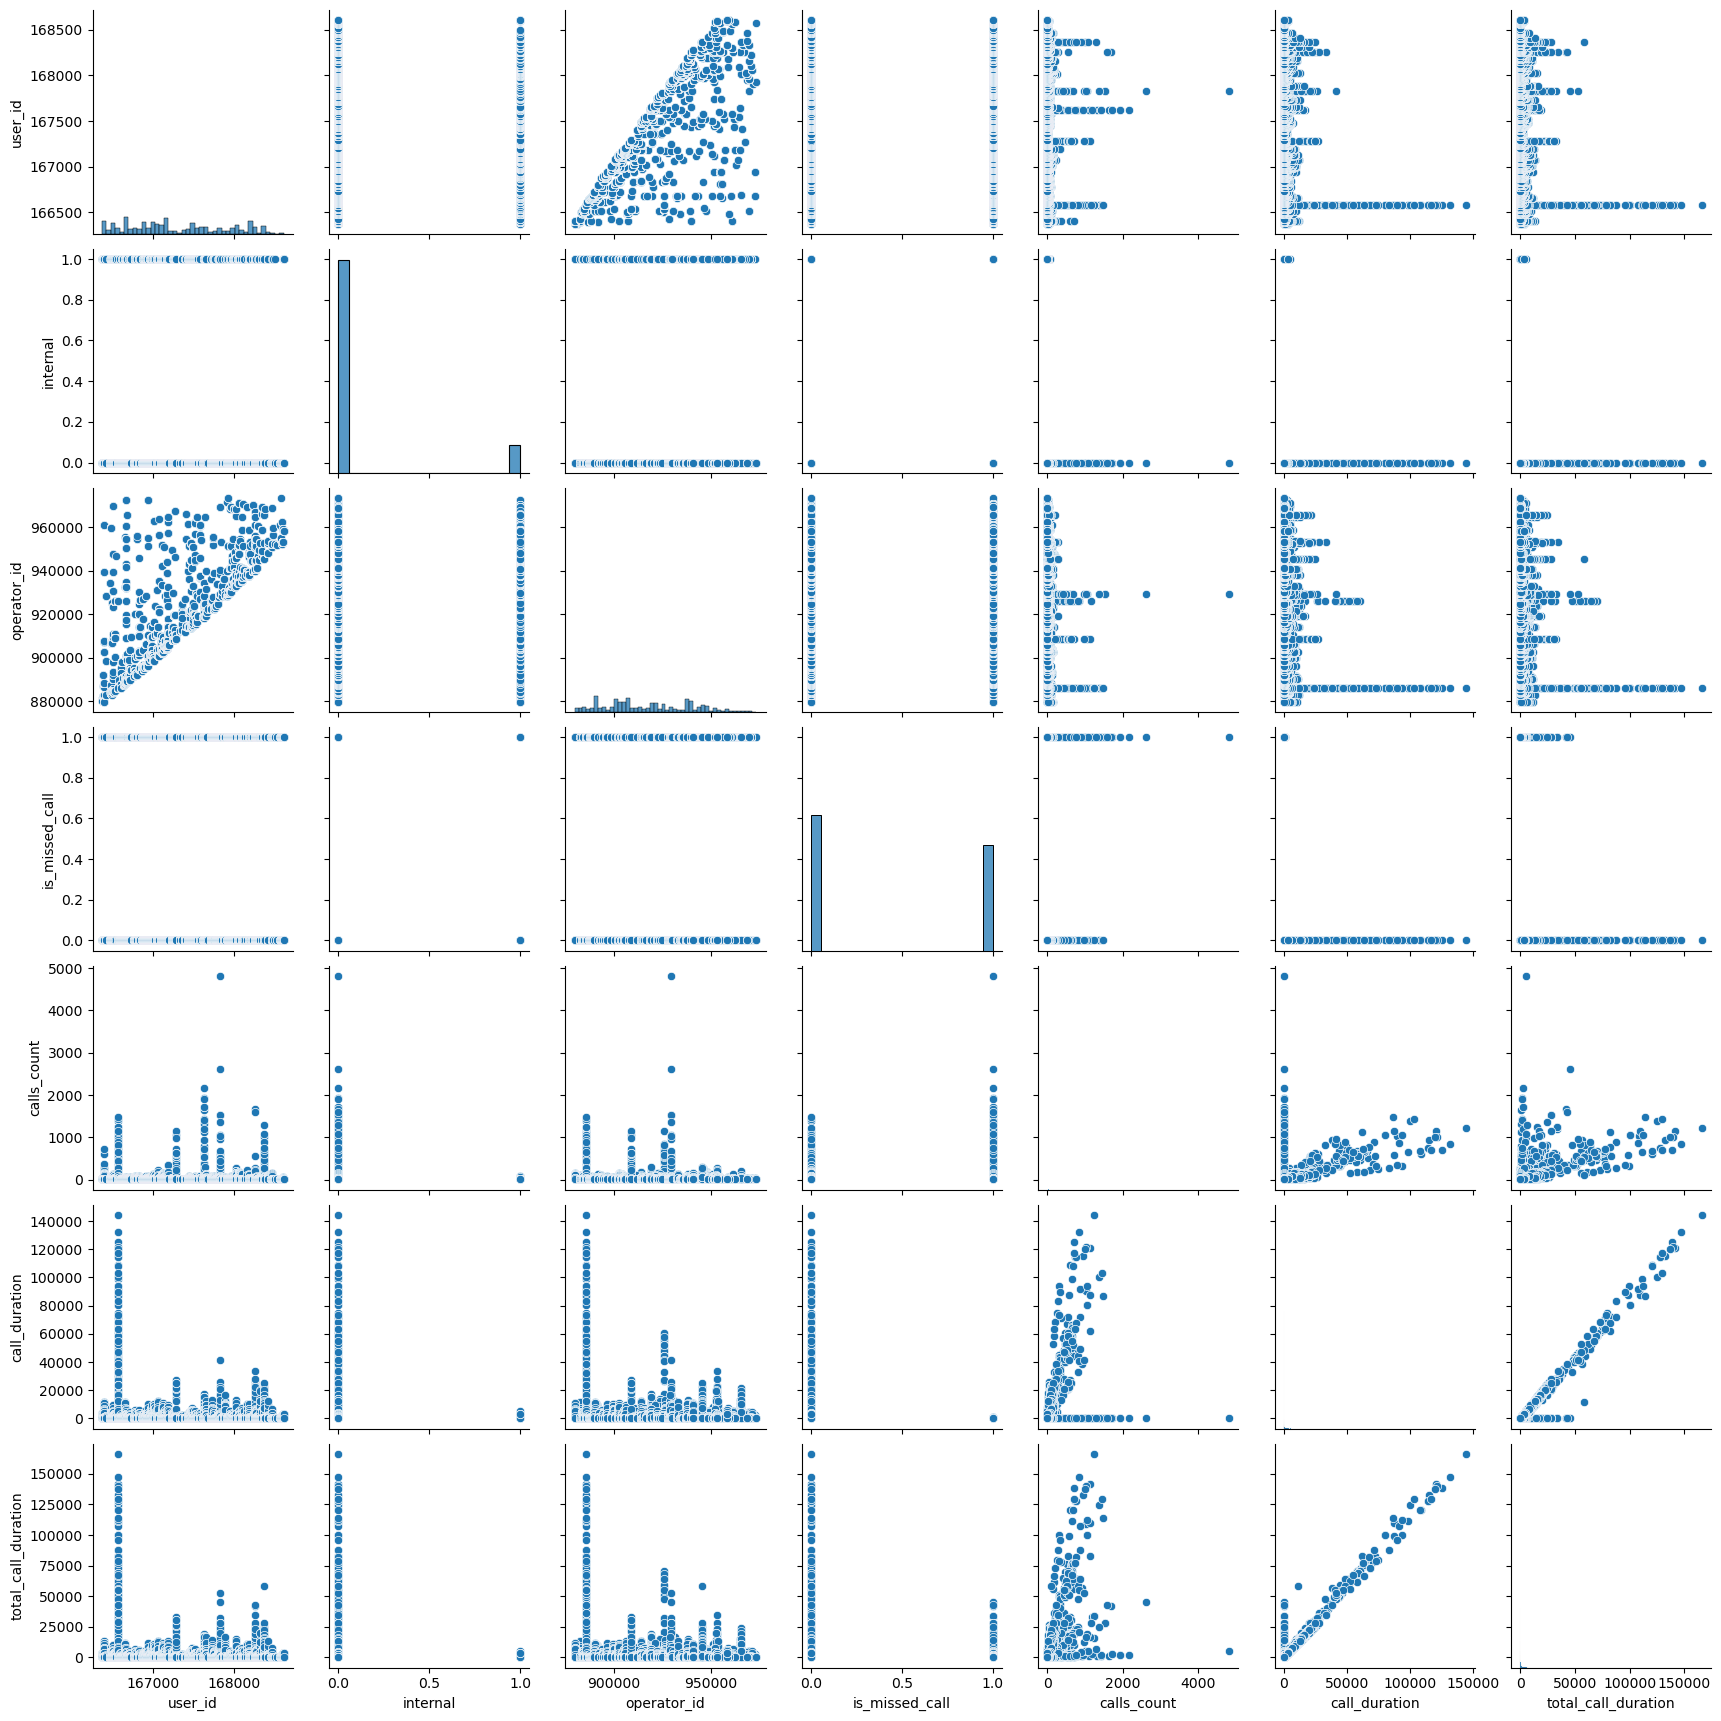

In [4]:
analisis_exploratorio(data)

En esta exploración de los datos se puede ver: <br>
* Los operadores que estan por arriba de la media en la duración de las llamadas.<br>
* La distribución de la duración de las llamadas según su conteo de llamadas.<br>
* Que cerca del 60% de las llamadas son llamadas perdidas.

Primeras líneas de los datos:
   user_id tariff_plan  date_start
0   166713           A  2019-08-15
1   166901           A  2019-08-23
2   168527           A  2019-10-29
3   167097           A  2019-09-01
4   168193           A  2019-10-16
Descripción de los datos:
             user_id
count     732.000000
mean   167431.927596
std       633.810383
min    166373.000000
25%    166900.750000
50%    167432.000000
75%    167973.000000
max    168606.000000

Información de los datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 17.3+ KB
None

Valores nulos en los datos:
user_id        0
tariff_plan    0
date_start     0
dtype: int64

Valores duplicados en los datos:
0


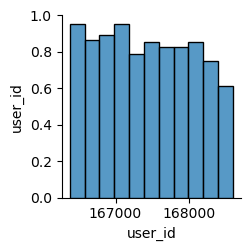

In [5]:
analisis_exploratorio(clientes)

In [6]:
# Se cambia el tipo de dato de la columna 'date' a datetime.

data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'].dt.tz_localize(None)

In [7]:
# porcentaje de valores nulos en cada columna

print("\nPorcentaje de valores nulos en cada columna:")
print(data.isna().mean())


Porcentaje de valores nulos en cada columna:
user_id                0.000000
date                   0.000000
direction              0.000000
internal               0.002171
operator_id            0.151608
is_missed_call         0.000000
calls_count            0.000000
call_duration          0.000000
total_call_duration    0.000000
dtype: float64


In [8]:
# Conocer el id de operador más antiguo y más reciente.

print("\nID de operador más antiguo y más reciente:")
print(data.operator_id.min())
print(data.operator_id.max())


ID de operador más antiguo y más reciente:
879896.0
973286.0


Se encuentrán valores nulos en dos columnas: internal 0.2% y operator_id 15.16% de los datos.<br>
Se eliminarán los valores nulos de la columna internal ya que no son representativos en la información y los de la columna operador_id se les asignara con el operador número 879000, ya que el operador_id minimo es de 879896.

In [9]:
# Eliminar los valores nulos de la columna 'internal'.

data_cleaned = data.dropna(subset=['internal'])

In [10]:
# Se imprime la información del dataframe después de eliminar los valores nulos.

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53785 non-null  int64         
 1   date                 53785 non-null  datetime64[ns]
 2   direction            53785 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          45670 non-null  float64       
 5   is_missed_call       53785 non-null  bool          
 6   calls_count          53785 non-null  int64         
 7   call_duration        53785 non-null  int64         
 8   total_call_duration  53785 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.7+ MB


In [11]:
# Llenar los valores nulos de la columna 'operator_id' con el valor ID 879000.

data_cleaned['operator_id'] = data_cleaned['operator_id'].fillna(879000)

/var/folders/js/08xhb5qx4cb0ckzsf_zf7_b40000gn/T/ipykernel_10713/269583473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['operator_id'] = data_cleaned['operator_id'].fillna(879000)


In [12]:
# Se imprime la información del dataframe después de llenar los valores nulos. 

data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53785 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53785 non-null  int64         
 1   date                 53785 non-null  datetime64[ns]
 2   direction            53785 non-null  object        
 3   internal             53785 non-null  object        
 4   operator_id          53785 non-null  float64       
 5   is_missed_call       53785 non-null  bool          
 6   calls_count          53785 non-null  int64         
 7   call_duration        53785 non-null  int64         
 8   total_call_duration  53785 non-null  int64         
dtypes: bool(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.7+ MB


In [13]:
# Se cambia el tipo de dato de la columna 'operator_id' de float a int.

data_cleaned['operator_id'] = data_cleaned['operator_id'].astype(int)

/var/folders/js/08xhb5qx4cb0ckzsf_zf7_b40000gn/T/ipykernel_10713/4176724519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['operator_id'] = data_cleaned['operator_id'].astype(int)


In [14]:
# Creación de la columna 'hold_time' que representa el tiempo de espera durante la llamada.

data_cleaned['hold_time'] = data_cleaned['total_call_duration'] - data_cleaned['call_duration']

/var/folders/js/08xhb5qx4cb0ckzsf_zf7_b40000gn/T/ipykernel_10713/447233466.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['hold_time'] = data_cleaned['total_call_duration'] - data_cleaned['call_duration']


In [15]:
# Impresión de las primeras líneas del dataframe después de eliminar los valores nulos y agregar columna 'hold_time'.

data_cleaned.head(1)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,hold_time
0,166377,2019-08-04,in,False,879000,True,2,0,4,4


In [16]:
# Se cambia el tipo de dato de la columna 'date_start' a datetime.

clientes['date_start'] = pd.to_datetime(clientes['date_start'])
clientes['date_start'] = clientes['date_start'].dt.tz_localize(None)

In [17]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   user_id      732 non-null    int64         
 1   tariff_plan  732 non-null    object        
 2   date_start   732 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 17.3+ KB


In [18]:
clientes.head()

,user_id,tariff_plan,date_start
0,166713,A,2019-08-15
1,166901,A,2019-08-23
2,168527,A,2019-10-29
3,167097,A,2019-09-01
4,168193,A,2019-10-16


In [19]:
# Creación de un nuevo dataframe con los datos de data_cleaned y clientes.

data_mix = data_cleaned.merge(clientes, on = 'user_id', how = 'inner')
data_mix['hold_time_per_call'] = round(data_mix['hold_time'] / data_mix['calls_count'], 2)
data_mix.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,hold_time,tariff_plan,date_start,hold_time_per_call
0,166377,2019-08-04,in,False,879000,True,2,0,4,4,B,2019-08-01,2.00
1,166377,2019-08-05,out,True,880022,True,3,0,5,5,B,2019-08-01,1.67
2,166377,2019-08-05,out,True,880020,True,1,0,1,1,B,2019-08-01,1.00
3,166377,2019-08-05,out,True,880020,False,1,10,18,8,B,2019-08-01,8.00
4,166377,2019-08-05,out,False,880022,True,3,0,25,25,B,2019-08-01,8.33


En el contexto que nos proporciona el proyecto nos indican que se considera un operador ineficaz a aquel trabajador que tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, el operador también tiene que realizar llamadas salientes, así que si en este rubro tiene pocas llamadas, de igual forma se le considerará ineficaz.<br>

Por lo tanto tenemos que crear métricas para poder definir cuáles son los trabajadores ineficaces.

In [20]:
# Pero, ¿Cuándo se considera una llamada como llamada perdida?
# En este escenario la llamada es perdida pero tiene segundos en el tiempo de espera.

print(data_mix.query('is_missed_call == True' and 'call_duration == 0').head())
print()
print('Numero de llamadas perdidas con call_duration = 0:')
print(len(data_mix.query('is_missed_call == True' and 'call_duration == 0')))

   user_id       date direction internal  operator_id  is_missed_call  \
0   166377 2019-08-04        in    False       879000            True   
1   166377 2019-08-05       out     True       880022            True   
2   166377 2019-08-05       out     True       880020            True   
4   166377 2019-08-05       out    False       880022            True   
6   166377 2019-08-05       out    False       880020            True   

   calls_count  call_duration  total_call_duration  hold_time tariff_plan  \
0            2              0                    4          4           B   
1            3              0                    5          5           B   
2            1              0                    1          1           B   
4            3              0                   25         25           B   
6            8              0                   50         50           B   

  date_start  hold_time_per_call  
0 2019-08-01                2.00  
1 2019-08-01                

En este escenario se pueden ver que existen más de 23 K llamadas perdidas con call_duration 0, pero en la tabla se pueden ver segundos en la columna total_call_duration.

In [21]:
# En este escenario la llamada no es perdida y la duración es 0.

print(data_mix.query('~is_missed_call == True and call_duration == 0').head())
print()
print('Número de llamadas que no son perdidas y tienen duración 0:')
print(len(data_mix.query('~is_missed_call == True and call_duration == 0')))

       user_id       date direction internal  operator_id  is_missed_call  \
1550    166405 2019-11-16       out    False       902532           False   
1558    166405 2019-11-16       out    False       902532           False   
2927    166485 2019-09-03       out     True       887276           False   
9510    166658 2019-11-06       out     True       890410           False   
10244   166678 2019-09-04       out     True       888868           False   

       calls_count  call_duration  total_call_duration  hold_time tariff_plan  \
1550             1              0                   27         27           B   
1558             1              0                   27         27           B   
2927             1              0                    4          4           B   
9510             1              0                    0          0           B   
10244            1              0                    5          5           B   

      date_start  hold_time_per_call  
1550  2019-

En este escenario se también se cuentan con segundos en total_call_duration.

In [22]:
print(data_mix.query('is_missed_call == True and total_call_duration == 0').head())
print()
print('Número de llamadas perdidas con total_call_duration = 0:')
print(len(data_mix.query('is_missed_call == True and total_call_duration == 0')))

     user_id       date direction internal  operator_id  is_missed_call  \
40    166377 2019-08-14       out     True       880026            True   
89    166377 2019-08-26       out     True       880022            True   
124   166377 2019-09-02       out     True       880020            True   
149   166377 2019-09-05       out     True       880022            True   
152   166377 2019-09-06       out     True       880022            True   

     calls_count  call_duration  total_call_duration  hold_time tariff_plan  \
40             2              0                    0          0           B   
89             3              0                    0          0           B   
124            2              0                    0          0           B   
149            2              0                    0          0           B   
152            2              0                    0          0           B   

    date_start  hold_time_per_call  
40  2019-08-01                 0.0  


Con estas caracteristicas se tienen 1314 llamadas perdidas en las cuales no se tuvieron segundos en la columna de total_call_duration ni hold_time.

In [23]:
print(data_mix.query('is_missed_call == True and direction == "in" and total_call_duration > 0').head())
print()
print('Número de llamadas perdidas con total_call_duration mayor 0:')
print(len(data_mix.query('is_missed_call == True and direction == "in" and total_call_duration > 0')))

    user_id       date direction internal  operator_id  is_missed_call  \
0    166377 2019-08-04        in    False       879000            True   
7    166377 2019-08-05        in    False       879000            True   
9    166377 2019-08-06        in    False       879000            True   
17   166377 2019-08-07        in    False       879000            True   
27   166377 2019-08-12        in    False       879000            True   

    calls_count  call_duration  total_call_duration  hold_time tariff_plan  \
0             2              0                    4          4           B   
7             6              0                   35         35           B   
9             4              0                   62         62           B   
17            2              0                   24         24           B   
27            2              0                   34         34           B   

   date_start  hold_time_per_call  
0  2019-08-01                2.00  
7  2019-08-01 

Hubo 8328 llamadas en las cuales tuvieron esperando al usuario y nunca contestaron su llamada, lo cual seguramente debio de generar molestia en el usuario.

In [24]:
# Creación de un nuevo dataframe con las métricas ineficientes.

ineffective_metrics = pd.DataFrame()

In [25]:
# Creación de las columnas para el nuevo dataframe ineffective mmetrics.

# Cantidad de llamadas perdidas.
ineffective_metrics['missed_calls'] = data_mix[
    (data_mix['is_missed_call'] == True) & 
    (data_mix['total_call_duration'] == 0)].groupby('operator_id').size()

# Cantidad de llamadas entrantes perdidas con el usuario esperando.
ineffective_metrics['missed_inbound_calls_waiting'] = data_mix[
    (data_mix['is_missed_call'] == True) &
    (data_mix['hold_time_per_call'] > 0) &
    (data_mix['direction'] == 'in')].groupby('operator_id').size()

# Tiempo promedio de espera en llamadas perdidas.
ineffective_metrics['avg_hold_time_inbound'] = data_mix.groupby('operator_id')['hold_time_per_call'].mean()

# Cantidad de llamadas salientes realizadas.
ineffective_metrics['outbound_calls'] = data_mix[
    data_mix['direction'] == 'out'].groupby('operator_id').size()

# Se rellenjaran los NaNs con ceros.
ineffective_metrics = ineffective_metrics.fillna(0)

print(ineffective_metrics.head())
print(len(ineffective_metrics))

             missed_calls  missed_inbound_calls_waiting  \
operator_id                                               
879000                361                        7585.0   
879896                  2                           0.0   
879898                  2                           0.0   
880020                  1                           0.0   
880022                  5                           0.0   

             avg_hold_time_inbound  outbound_calls  
operator_id                                         
879000                   18.474423             198  
879896                   15.229844             105  
879898                   14.673840             187  
880020                    5.865909              14  
880022                   14.838026              68  
328


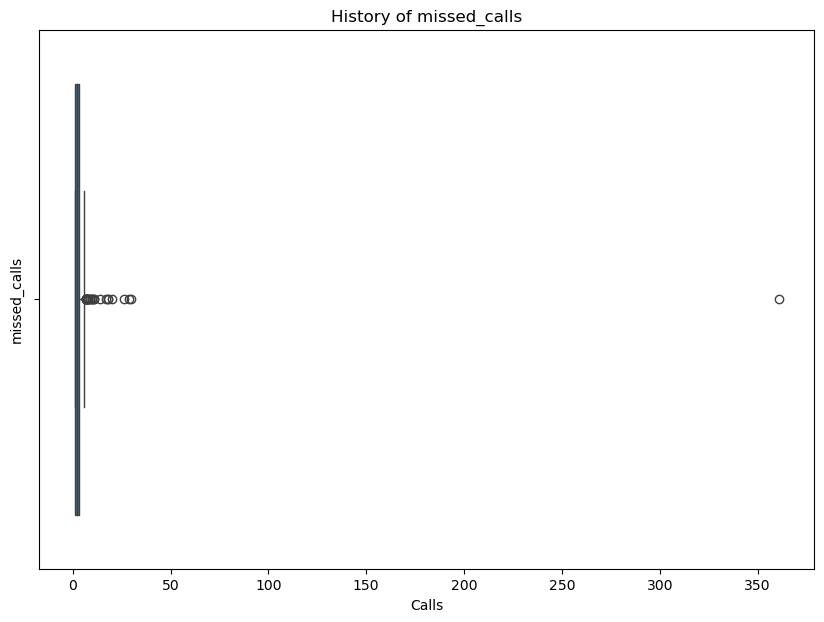

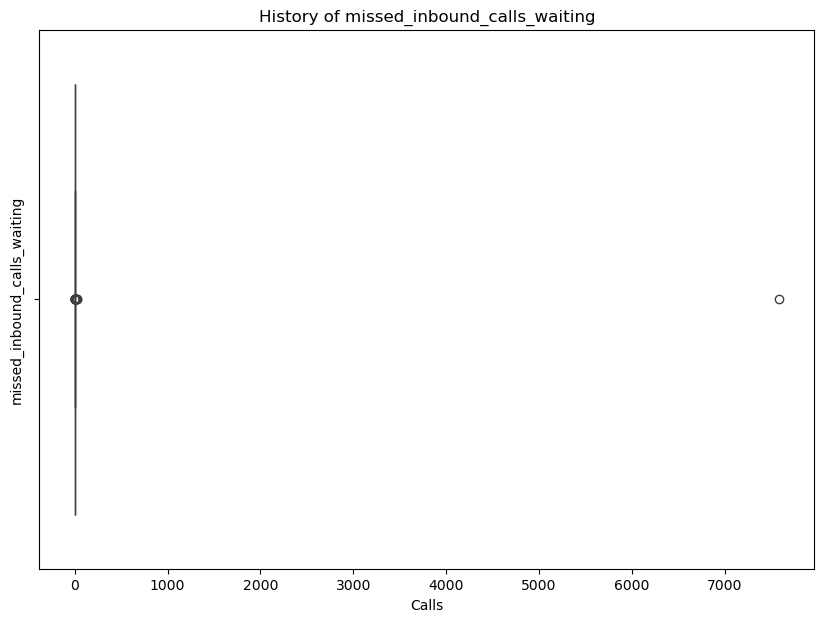

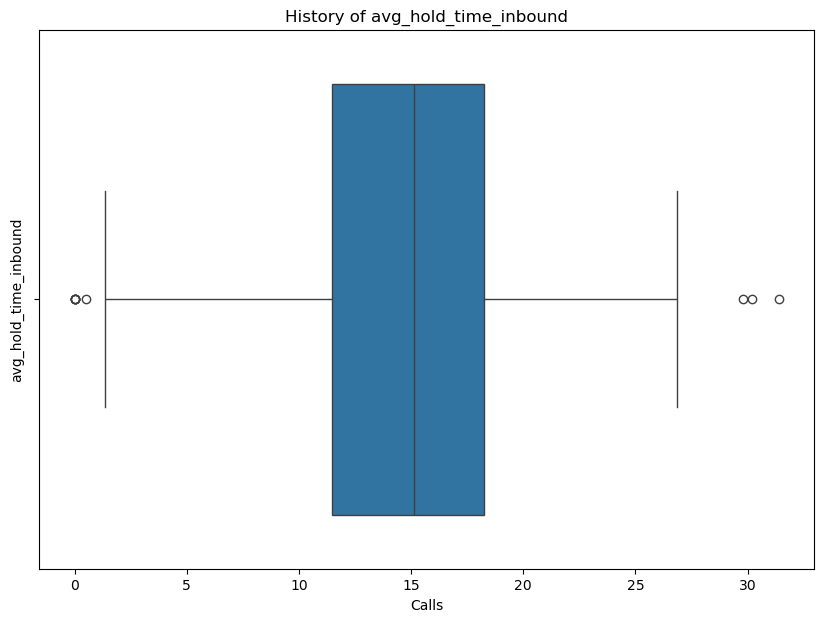

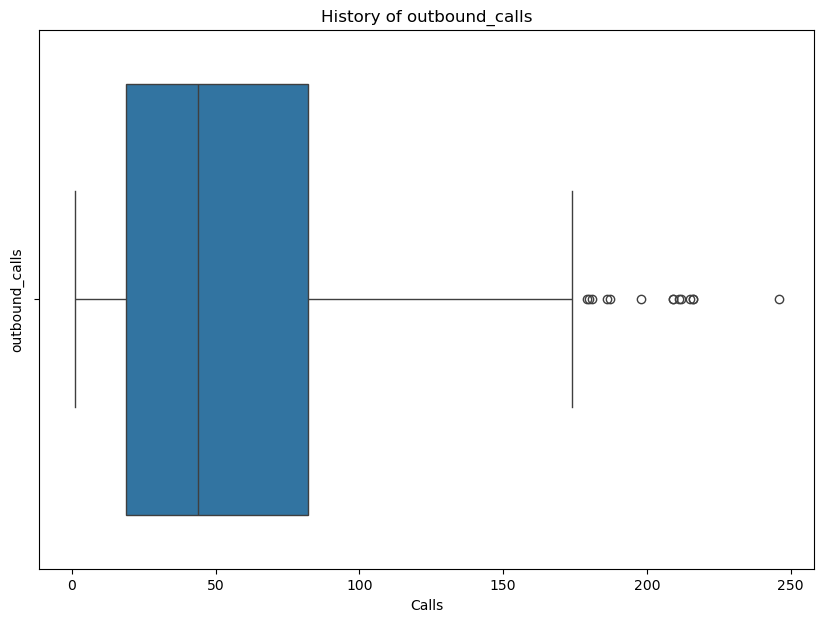

In [26]:
# Se grafican cajas de bigote para visualizar los percentiles y 
# poder considerar este dato como límites para las métricas.

for col in ineffective_metrics.columns:
    fig, ax = plt.subplots(figsize=(10,7))
    sns.boxplot(data = ineffective_metrics, x = col)    
    plt.xlabel('Calls')
    plt.ylabel(col)
    plt.title(f'History of {col}')
    plt.show()

Con estas gráficas se definen los threshold para las métricas.

In [27]:
# Se definen los umbrales para las métricas de ineficiencia.

missed_calls_threshold = 2
missed_calls_waiting_threshold = 0
hold_time_threshold = 0
outbound_threshold = 60

### 3 Identificar a los operadores.

##### Operadores más ineficaces.

In [28]:
# Número de operador_id únicos.

print("Número de operadores:", data_mix['operator_id'].nunique())

Número de operadores: 1093


In [29]:
# Creación de las métricas de ineficiencia.

inefficient_operators = ineffective_metrics[
    (ineffective_metrics['missed_calls'] > missed_calls_threshold) &
    (ineffective_metrics['missed_inbound_calls_waiting'] > missed_calls_waiting_threshold) &
    #(ineffective_metrics['avg_hold_time_inbound'] > hold_time_threshold) &
    (ineffective_metrics['outbound_calls'] < outbound_threshold)
]
print(f'El numero de operadores infecientes es : {len(inefficient_operators)}')
print('Los operadores ineficientes son:')
print(inefficient_operators)

El numero de operadores infecientes es : 17
Los operadores ineficientes son:
             missed_calls  missed_inbound_calls_waiting  \
operator_id                                               
888868                  4                           1.0   
890228                  4                           1.0   
890582                  4                           1.0   
908958                  6                           4.0   
911310                  3                           2.0   
913942                  8                          29.0   
919554                  3                          11.0   
926490                  3                           1.0   
938414                  4                           2.0   
944646                  5                           1.0   
945052                  4                           1.0   
947304                  6                           4.0   
948758                  3                           1.0   
951508                  5             

##### ¿Cúal es la duración promedio de las llamadas por día? 

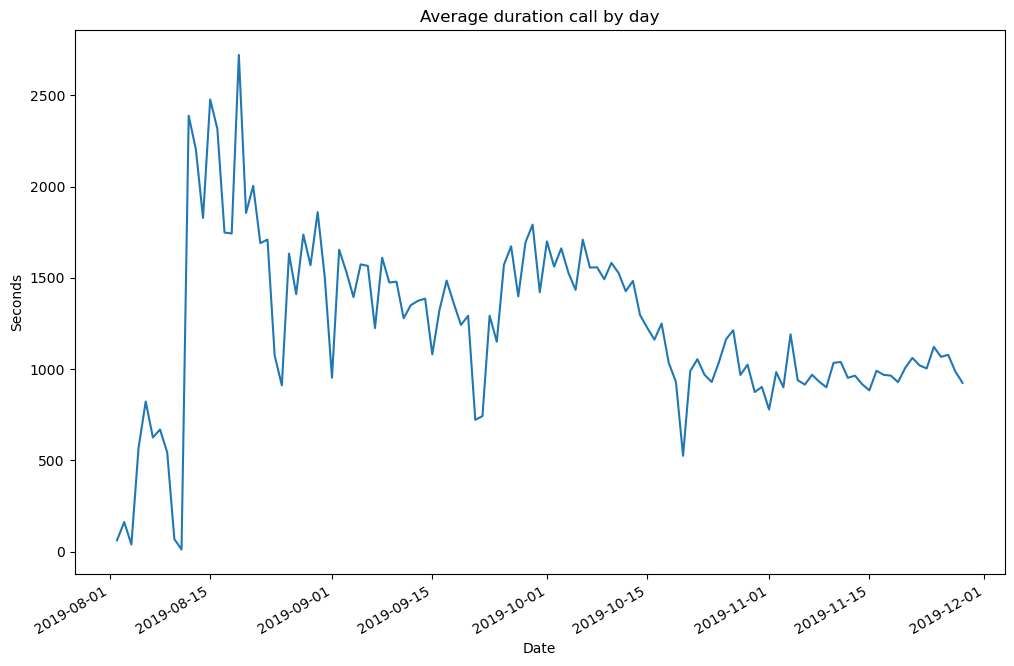

In [30]:
# Creación de un gráfico que muestre el promedio de la duración de la llamada por día.
 
avg_call_duration = data_mix.groupby('date')['total_call_duration'].mean()

fig, ax = plt.subplots(figsize = (12, 8))
sns.lineplot(data = avg_call_duration)
plt.title('Average duration call by day')
plt.ylabel('Seconds')
plt.xlabel('Date')
fig.autofmt_xdate(rotation = 30)
plt.show()

En esta gráfica se puede observar que la duración promedio de las llamadas por día en general ronda entre los mil y dos mil segundos en promedio al día.

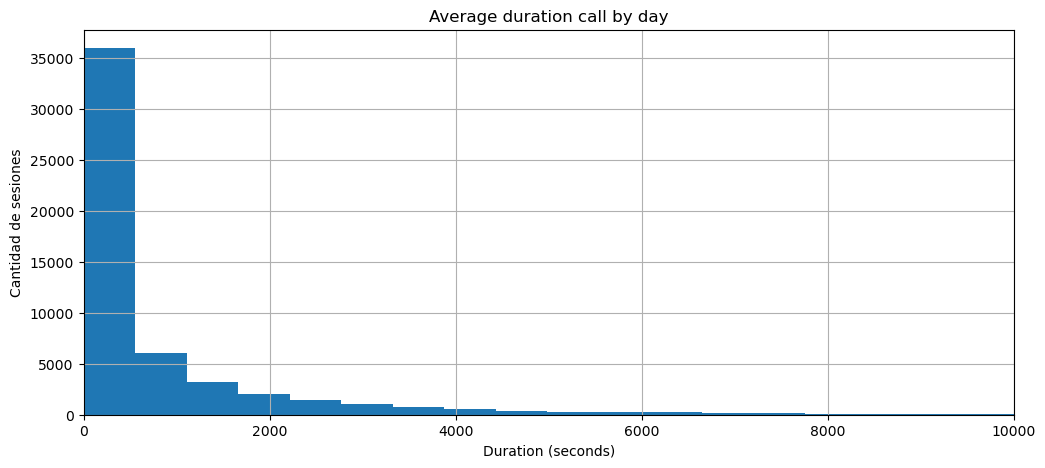

In [31]:
# Creación de un histograma para visualizar la duración de las llamadas.
 
plt.figure(figsize = (12,5))
data_mix['total_call_duration'].hist(bins = 300).set(
    title = 'Average duration call by day',
    xlabel = 'Duration (seconds)',
    ylabel = 'Cantidad de sesiones')
plt.xlim(0, 10000)
plt.show()

Hay más de 40000 llamadas con una duración menor de 1000 segundos.

##### ¿Cuántas llamadas entrantes son recibidas por día?

In [32]:
# Se crea un df con solo las llamadas entrantes y se elabora una gráfica.

inbound = data_mix[data_mix['direction'] == 'in']
inbound_call_by_day = inbound.groupby('date')['calls_count'].sum().reset_index()

fig = px.line(inbound_call_by_day, 
             x ='date', 
             y = 'calls_count',
             title = "Inbound calls per day")
fig.update_traces(textposition='top center')
fig.update_layout(xaxis_title="Date",
                yaxis_title="Inbound Calls",
                xaxis_tickangle = -45)
fig.show()

En esta gráfica se muestra el número de llamadas entrantes por día, durante los meses de agosto y septiembre hubo muy pocas llamadas, fue in creccendo hasta llegar a las 2 mil llamadas díarias para finales de septiembre.<br>
Para los meses de octubre y noviembre estuvieron en picos de altas y bajas, en promedio fueron cerca de 3 mil llamdas diarias, pero hubo un pico más bajo de lalamadas de cerca de 600 llamadas, mientras que el pico más alto de llamadas en un día fue de cerca de 7 mil llamadas.

##### ¿Qué operadores tuvieron más llamadas perdidas con el usuario esperando en la línea?

In [33]:
# Se toma la métrica missed_inbound_calls_waiting y se resetea el index. 
missed_inbound_calls_waiting = ineffective_metrics['missed_inbound_calls_waiting'].reset_index()

# Ordenación decendente de los usuarios que tuvieron más llamadas perdidas.
order_missed_inbound_calls_waiting = missed_inbound_calls_waiting.sort_values(
    'missed_inbound_calls_waiting', ascending = False)

# Creacón de nueva columna con el operator_id en string para que sea más fácil gráficar.
order_missed_inbound_calls_waiting['operator_id'] = order_missed_inbound_calls_waiting[
    'operator_id'].astype(str)

# Elaboración de gráfica. 
fig1 = px.bar(order_missed_inbound_calls_waiting.nlargest(30, 'missed_inbound_calls_waiting'), 
             x ='operator_id', 
             y = 'missed_inbound_calls_waiting',
             text_auto = 'missed_inbound_calls_waiting',
             title = "Missed inbound calls with hold time by user",
             color = "operator_id")
fig1.update_traces(textposition='outside')
fig1.update_layout(xaxis_title="Operator ID", 
                  yaxis_title="Missed Inbound Calls (Waiting)",
                  xaxis_tickangle = -45 )
fig1.show()

Creamos un operador para rellenar los datos y fue el triunfador en este rubro, pero quitandolo de en medio, los tres operadores que tiene más llamadas perdidas con el usuario en espera fueron:<br>
* operator_id 913942 con 29 llamadas.<br>
* operator_id 885876 con 21 llamadas.<br>
* operator_id 940588 con 15 llamadas.

##### ¿Que operadores hacen menos llamadas salientes?

In [34]:
outbound_calls_operator = data_mix[data_mix['direction'] == 'out'].groupby('operator_id').size().reset_index()
outbound_calls_operator.columns = ['operator_id', 'outbound_counts']
outbound_calls_operator['operator_id'] = outbound_calls_operator['operator_id'].astype(str)
order_outbound_calls_operator = outbound_calls_operator.sort_values('outbound_counts')
#.nsmallest(100, 'outbound_counts')
# Elaboración de gráfica. 
fig2 = px.bar(order_outbound_calls_operator, 
             x ='operator_id', 
             y = 'outbound_counts',
             text_auto = 'outbound_counts',
             title = "Outbound calls by operator",
             color = "operator_id")
fig2.update_traces(textposition='outside')
fig2.update_layout(xaxis_title="Operator ID", 
                  yaxis_title="Outbound Calls",
                  xaxis_tickangle = -45 )
fig2.show()

Se realizó este tipo grafico dinámico para que se puedan visualizar de manera ascendente de los operadores que realizaron menos llamadas hasta el que realizó más llamadas, se puede acercar seleccionando en el gráfico el área que se desea ampliar.

Son bastantes operadores los que realizaron menos de 10 llamadas.

In [35]:
# Se ve la frecuencia de los operadores de las llamadas salientes que realizaron los operadores.

frecuency = order_outbound_calls_operator['outbound_counts'].value_counts().sort_index()
print(frecuency)

outbound_counts
1      74
2      45
3      46
4      35
5      24
       ..
211     1
212     1
215     1
216     2
246     1
Name: count, Length: 147, dtype: int64


74 operadores realizaron 1 sola llamada.<br>
45 operadores realizaron 2 llamadas.<br>
46 operadores realizaron 3 llamadas.

Los 17 operadores más ineficientes son:

In [36]:
inefficient_operators

,missed_calls,missed_inbound_calls_waiting,avg_hold_time_inbound,outbound_calls
operator_id,,,,
888868,4,1.0,18.490294,19
890228,4,1.0,17.907347,43
890582,4,1.0,13.358630,29
908958,6,4.0,19.845613,56
911310,3,2.0,17.026832,40
913942,8,29.0,13.769793,55
919554,3,11.0,30.209247,10
926490,3,1.0,17.810909,46
938414,4,2.0,12.018710,22


Si bien hay operadores que tienen en promedio más tiempo en espera al usuario en la llamada, o algunos que solo hicieron una llamada saiente, estos 18 operadores son los que incumplen en todas métricas.

### 4 Probar las hipótesis estadistícas.

##### Generación de hipótesis.

Se crean 3 grupos según las tarifas del plan que manejan los usuarios, con las columnas: hold_time, operator_id y tariff_plan. Se cambian los nombres de las columnas.

In [37]:
op_a = data_mix.query('tariff_plan == "A"')[['hold_time', 'operator_id', 'tariff_plan']]
op_a.columns = ['seconds', 'operator', 'tariff']
op_b = data_mix.query('tariff_plan == "B"')[['hold_time', 'operator_id', 'tariff_plan']]
op_b.columns = ['seconds', 'operator', 'tariff']
op_c = data_mix.query('tariff_plan == "C"')[['hold_time', 'operator_id', 'tariff_plan']]
op_c.columns = ['seconds', 'operator', 'tariff']
alpha = 0.05

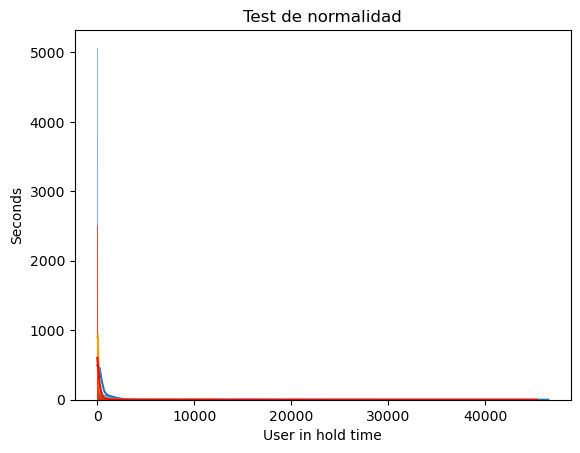

In [38]:
# Se crean dos histogramas para visualizar la distribución estandar de nuestros valores y 
# la curva de probabilidad.

sns.histplot(op_a['seconds'], kde = True)
sns.histplot(op_b['seconds'], kde = True, color = 'orange')
sns.histplot(op_c['seconds'], kde = True, color = 'red')
plt.xlabel('User in hold time')
plt.ylabel('Seconds')
plt.title('Test de normalidad')
plt.show()

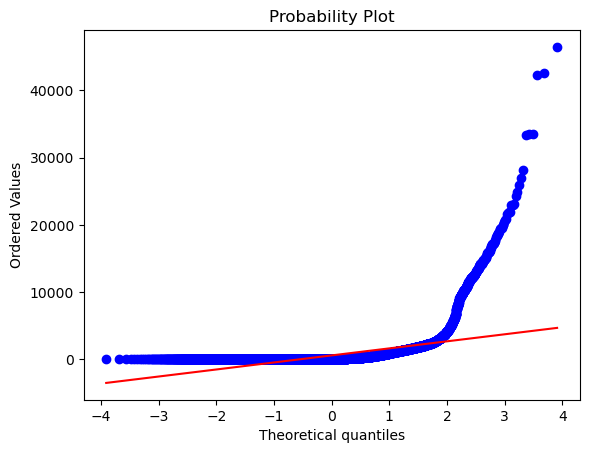

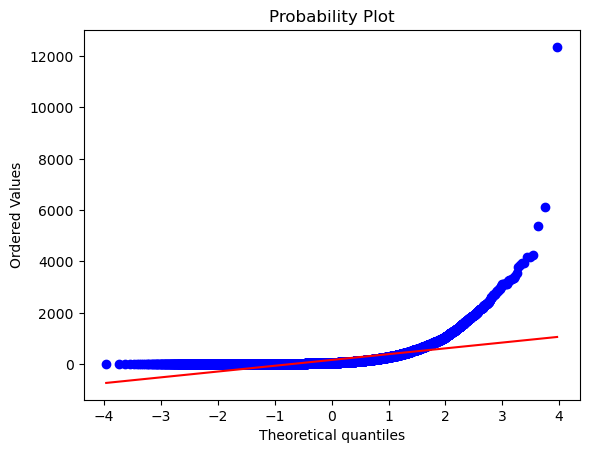

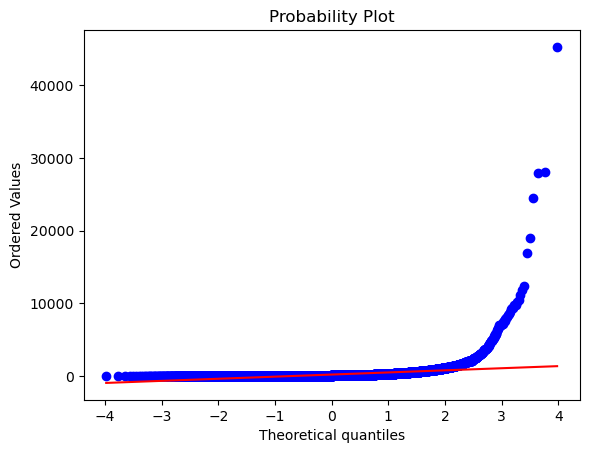

In [39]:
# Se hace una prueba Quantile-Quantile.

st.probplot(op_a['seconds'], dist = "norm", plot=pylab)
pylab.show()

st.probplot(op_b['seconds'], dist = "norm", plot=pylab)
pylab.show()

st.probplot(op_c['seconds'], dist = "norm", plot=pylab)
pylab.show()

Se hace una prueba Quantile-Quantile, esta prueba nos indica que entre más cercanos esten nuestros valores a la línea recta, más parecida será su distribución a la normal. Si existen discrepancias estadisticas entre la distribución normal, la trayectoria de puntos tendra desviaciones considerables contra la línea.

In [40]:
# Elaboración de una función que nos permita verificar la normalidad de los datos.

def checar_normalidad(datos):
    test_stats_normality, p_value_normality = st.shapiro(datos)
    print("p value:%.05f" % p_value_normality)
    if p_value_normality < 0.05:
        print("No se puede asumir normalidad")
    else:
        print("Se puede asumir normalidad")

In [41]:
checar_normalidad(op_a['seconds'])

p value:0.00000
No se puede asumir normalidad


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 14870.



In [42]:
checar_normalidad(op_b['seconds'])

p value:0.00000
No se puede asumir normalidad


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 18904.



In [43]:
checar_normalidad(op_c['seconds'])

p value:0.00000
No se puede asumir normalidad


/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning:

scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20011.



No se pudo verficar la normalidad de los datos con el test shapiro debido a que las muestras cuentan con más de 5 mil observaciones. Para ello se utilizará el test "normaltest".

In [44]:
from scipy.stats import normaltest

# Elaboración de una función que nos permita verificar la normalidad con más de 5000 observaciones.

def verificar_normalidad(datos):
    stat, p_value_normality = normaltest(datos)
    print("p value:%.05f" % p_value_normality)
    if p_value_normality < 0.05:
        print("No se puede asumir normalidad")
    else:
        print("Se puede asumir normalidad")

In [45]:
verificar_normalidad(op_a['seconds'])

p value:0.00000
No se puede asumir normalidad


In [46]:
verificar_normalidad(op_b['seconds'])

p value:0.00000
No se puede asumir normalidad


In [47]:
verificar_normalidad(op_c['seconds'])

p value:0.00000
No se puede asumir normalidad


No se puede asumir normalidad en los datos.

In [48]:
# Función de prueba estadística para comparar si existe diferencia significativa entre 
# los tiempos de los experimentos(mannwhitneyu).

def checar_diferencias_estadisticas_significativas(datos1, datos2):
    
    u_stats, p_value = st.mannwhitneyu(datos1, datos2)
    print(f'Estadistico U: {u_stats}')
    print(f'p-value: {p_value}')
    if p_value < 0.05:
        print('Existen diferencias estadisticamente significativas entre los grupos.')
    else:
        print('No existen diferencias estadisticamente significativas entre los grupos.')

In [49]:
checar_diferencias_estadisticas_significativas(op_a['seconds'], op_b['seconds'])

Estadistico U: 162153959.0
p-value: 2.6575565402304753e-130
Existen diferencias estadisticamente significativas entre los grupos.


In [50]:
checar_diferencias_estadisticas_significativas(op_a['seconds'], op_c['seconds'])

Estadistico U: 174172955.0
p-value: 3.980866930704035e-164
Existen diferencias estadisticamente significativas entre los grupos.


In [51]:
checar_diferencias_estadisticas_significativas(op_b['seconds'], op_c['seconds'])

Estadistico U: 192992462.5
p-value: 0.0005113009318823891
Existen diferencias estadisticamente significativas entre los grupos.


Entre los 3 grupos de datos de las tarifas de los clientes, existen diferencias estadisticamente significativas entre todos los grupos.

In [52]:
# Elaboración de prueba levene para comparar las varianzas de los dos grupos de datos.

def comprobar_varianzas(datos1, datos2):
    
    stat, p = levene(datos1, datos2)
    print('Estadistico= %.3f, p= %.3f' % (stat, p))
    print(f'p-value: {p}')
    if p > alpha:
        print('Las varianzas son iguales (no se rechaza H0)')
    else:
        print('Las varianzas no son iguales (se rechaza H0)')

In [53]:
comprobar_varianzas(op_a['seconds'], op_b['seconds'])

Estadistico= 937.409, p= 0.000
p-value: 4.3601845487313834e-203
Las varianzas no son iguales (se rechaza H0)


In [54]:
comprobar_varianzas(op_a['seconds'], op_c['seconds'])

Estadistico= 801.303, p= 0.000
p-value: 2.644421496332875e-174
Las varianzas no son iguales (se rechaza H0)


In [55]:
comprobar_varianzas(op_b['seconds'], op_c['seconds'])

Estadistico= 13.749, p= 0.000
p-value: 0.00020927754726353867
Las varianzas no son iguales (se rechaza H0)


De igual manera en las tres muestras las varianzas son desiguales.

##### Comprobación de hipótesis.

In [56]:
# Se comprobará la siguiente hipotesis:
# El tiempo en espera promedio de los usuarios para las tarifas A y B son los mismas.

primer_hipotesis = st.ttest_ind(op_a['seconds'], op_b['seconds'], equal_var = False)

print(f'p-value: {primer_hipotesis.pvalue}')

if (primer_hipotesis.pvalue < alpha):
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value: 1.6148113824349738e-162
Podemos rechazar la hipotesis nula


In [57]:
# Se comprobará la siguiente hipotesis:
# El tiempo en espera promedio de los usuarios para las tarifas A y C son los mismas.

segunda_hipotesis = st.ttest_ind(op_a['seconds'], op_c['seconds'], equal_var = False)

print(f'p-value: {primer_hipotesis.pvalue}')

if (primer_hipotesis.pvalue < alpha):
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value: 1.6148113824349738e-162
Podemos rechazar la hipotesis nula


In [58]:
# Se comprobará la siguiente hipotesis:
# El tiempo en espera promedio de los usuarios para las tarifas A y C son los mismas.

tercer_hipotesis = st.ttest_ind(op_b['seconds'], op_c['seconds'], equal_var = False)

print(f'p-value: {primer_hipotesis.pvalue}')

if (primer_hipotesis.pvalue < alpha):
    print("Podemos rechazar la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

p-value: 1.6148113824349738e-162
Podemos rechazar la hipotesis nula


In [59]:
hold = pd.concat([op_a, op_b, op_c])

### 5 Conclusiones.

Se puede llegar a las siguientes conclusiones:<br>

Los 17 operadores más ineficientes ya que incumplen en todos los rubros son:

In [60]:
inefficient_operators

,missed_calls,missed_inbound_calls_waiting,avg_hold_time_inbound,outbound_calls
operator_id,,,,
888868,4,1.0,18.490294,19
890228,4,1.0,17.907347,43
890582,4,1.0,13.358630,29
908958,6,4.0,19.845613,56
911310,3,2.0,17.026832,40
913942,8,29.0,13.769793,55
919554,3,11.0,30.209247,10
926490,3,1.0,17.810909,46
938414,4,2.0,12.018710,22


Si bien hay usuarios que tienen más llamas perdidas, más llamadas perdidas con tiempo de espera del usuario y que hicieron menos llamadas, estos incumplen en los 4 parametros a la vez.
Ya que se definió que:<br>
* No se podía tener más de 3 llamadas perdidas.<br>
* No se permite tener llamadas perdidas con el usuario esperando en la línea.<br>
* Haber realizado menos de 60 llamadas salientes.<br>

Los operadores acostumbran a dejar al usuario por más tiempo en espera según la tarifa del plan que tengan, según el siguiente gráfico....

In [61]:
fig4 = px.line(
    hold, 
    x = 'operator', 
    y = "seconds", 
    color = "tariff",
    title = 'Hold time by user')

fig4.show()

Los usuarios que cuentan con la tarifa del plan A, son los que pasan mucho más tiempo en espera, hubo un operador que tuvo un tiempo de espera de 46,474 segundos en 103 llamadas <br>

Siguen los usuarios con el plan C, hubo un operador que desafortunadamente estuvo en espera 45,312 segundos intentando llamar un total de 2,614 llamadas salientes.<br>
Pero, ¿Porqué este usuario habrá intentado realizar tantas llamadas sin exito? 

Y por último los usuarios con el Plan B, aquí no hay casos tan alarmantes como en los otros planes.